Number of customers in each classes:
 3    281
1    266
4    236
2    217
Name: custcat, dtype: int64


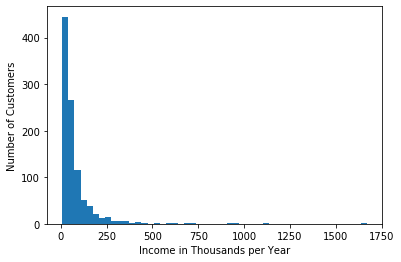

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)
Train set Accuracy for k=4:  0.5475
Test set Accuracy for k=4:  0.32

 Model accuracy for Different number of Neighbors:


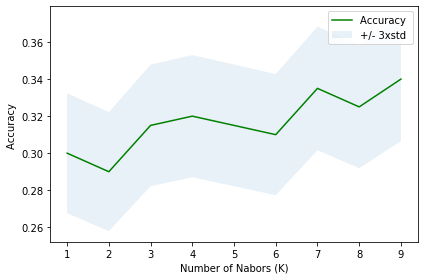

The best accuracy was with 0.34 with k= 9


In [16]:
#########################################################################################################################
##########################################   K-Nearest Neighbors Model   ################################################
#########################################################################################################################

# K-Nearest Neighbors is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding 
# to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine 
# it's classification.

# Lets load required libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

# About the dataset
# A telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four 
# groups. If demographic data can be used to predict group membership, the company can customize offers for individual 
# prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build 
# a model to be used to predict class of a new or unknown case.
# The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.
# The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 
# 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service
# Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification 
# called K nearest neighbour.
# Lets download the dataset. To download the data, we will use !wget to download it from IBM Object Storage.

# Load Data From CSV File
url='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv'
df = pd.read_csv(url)
df.head()

# Data Visualization and Analysis
# Let’s see how many of each class is in our data set
print("Number of customers in each classes:\n",df['custcat'].value_counts())

# We can easily explore your data using visualization techniques:
plt.hist(df['income'], density = False, bins=50)
plt.ylabel('Number of Customers')
plt.xlabel('Income in Thousands per Year')
plt.show()

# Feature set:
# Lets define feature sets, X
df.columns

#To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

y = df['custcat'].values
y[0:5]

# Normalize Data
# Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN 
# which is based on distance of cases

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

# Train Test Split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Classification:
# K nearest neighbor (KNN)
# Training
# Lets start the algorithm with k=4 for now:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

# Predicting
# we can use the model to predict the test set:
yhat = neigh.predict(X_test)
yhat[0:5]

# Accuracy evaluation
# In multilabel classification, accuracy classification score is a function that computes subset accuracy. 
# This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels 
# and predicted labels are matched in the test set.

print("Train set Accuracy for k=4: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy for k=4: ", metrics.accuracy_score(y_test, yhat))

# What about other K?
# K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose 
# right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. 
# Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your 
# test set. Repeat this process, increasing the k, and see which k is the best for your model.
# We can calculate the accuracy of KNN for different Ks:

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

# Plot model accuracy for Different number of Neighbors
print('\n Model accuracy for Different number of Neighbors:')
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 